In [1]:
import pandas as pd
import numpy as np

#graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
import plotly.tools as tls

##############  OFFLINE  ##############
plotly.offline.init_notebook_mode(connected=True)
#to plot offline: ##plotly.offline.iplot##

##############  ONLINE  ##############
#plotly.tools.set_credentials_file(username='arnaurovira23', api_key='7y46ugRJ8Rl6XCkCwBGM')
#to plot online: ##py.iplot##
import plotly.plotly as py

from fancyimpute import KNN

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Train dataset

In [2]:
df_train = pd.read_csv('dengue_features_train.csv',index_col=[0,1,2])
df_train.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [3]:
df_train.drop('week_start_date', axis = 1, inplace = True)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, (sj, 1990, 18) to (iq, 2010, 25)
Data columns (total 20 columns):
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-null float64
reanalysis_specific_humidity_g_per_kg    1446 non-n

In [5]:
df_train.describe()

ndvi_ne      ndvi_nw      ndvi_se      ndvi_sw  \
count  1262.000000  1404.000000  1434.000000  1434.000000   
mean      0.142294     0.130553     0.203783     0.202305   
std       0.140531     0.119999     0.073860     0.083903   
min      -0.406250    -0.456100    -0.015533    -0.063457   
25%       0.044950     0.049217     0.155087     0.144209   
50%       0.128817     0.121429     0.196050     0.189450   
75%       0.248483     0.216600     0.248846     0.246982   
max       0.508357     0.454429     0.538314     0.546017   

       precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
count           1443.000000            1446.000000            1446.000000   
mean              45.760388             298.701852             299.225578   
std               43.715537               1.362420               1.261715   
min                0.000000             294.635714             294.892857   
25%                9.800000             297.658929             298.257143   
50%               38.340000             298.646429             299.289286   
75%               70.235000             299.833571             300.207143   
max              390.600000             302.200000             302.928571   

       reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
count                  1446.000000                1446.000000   
mean                    295.246356                 303.427109   
std                       1.527810                   3.234601   
min                     289.642857                 297.800000   
25%                     294.118929                 301.000000   
50%                     295.640714                 302.400000   
75%                     296.460000                 305.500000   
max                     298.450000                 314.000000   

       reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
count                1446.000000                      1446.000000   
mean                  295.719156                        40.151819   
std                     2.565364                        43.434399   
min                   286.900000                         0.000000   
25%                   293.900000                        13.055000   
50%                   296.200000                        27.245000   
75%                   297.900000                        52.200000   
max                   299.900000                       570.500000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                           1446.000000                   1443.000000   
mean                              82.161959                     45.760388   
std                                7.153897                     43.715537   
min                               57.787143                      0.000000   
25%                               77.177143                      9.800000   
50%                               80.301429                     38.340000   
75%                               86.357857                     70.235000   
max                               98.610000                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                            1446.000000        1446.000000   
mean                               16.746427           4.903754   
std                                 1.542494           3.546445   
min                                11.715714           1.357143   
25%                                15.557143           2.328571   
50%                                17.087143           2.857143   
75%                                17.978214           7.625000   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1413.000000              1413.000000         1436.000000   
mean            27.185783                 8.059328           32.452437   
std              1.292347              

In [6]:
len_train = df_train.shape[0]
print(f'len of the train dataset: {len_train}')

len of the train dataset: 1456


In [7]:
df_train_nanvalues = pd.DataFrame(df_train.isnull().sum(), columns = ['num_of_nan_values'])
df_train_nanvalues

num_of_nan_values
ndvi_ne                                              194
ndvi_nw                                               52
ndvi_se                                               22
ndvi_sw                                               22
precipitation_amt_mm                                  13
reanalysis_air_temp_k                                 10
reanalysis_avg_temp_k                                 10
reanalysis_dew_point_temp_k                           10
reanalysis_max_air_temp_k                             10
reanalysis_min_air_temp_k                             10
reanalysis_precip_amt_kg_per_m2                       10
reanalysis_relative_humidity_percent                  10
reanalysis_sat_precip_amt_mm                          13
reanalysis_specific_humidity_g_per_kg                 10
reanalysis_tdtr_k                                     10
station_avg_temp_c                                    43
station_diur_temp_rng_c                               43
station_max_temp_c                                    20
station_min_temp_c                                    14
station_precip_mm                                     22

In [8]:
df_train.dropna(how='all', inplace = True)

##### split train in sq & iq

In [9]:
df_train_sj = df_train[df_train.index.get_level_values('city')=='sj']
df_train_iq = df_train[df_train.index.get_level_values('city')=='iq']

## Test dataset

In [10]:
df_test = pd.read_csv('dengue_features_test.csv',index_col=[0,1,2])
df_test.head()

week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                          
sj   2008 18              2008-04-29  -0.0189 -0.018900  0.102729  0.091200   
          19              2008-05-06  -0.0180 -0.012400  0.082043  0.072314   
          20              2008-05-13  -0.0015       NaN  0.151083  0.091529   
          21              2008-05-20      NaN -0.019867  0.124329  0.125686   
          22              2008-05-27   0.0568  0.039833  0.062267  0.075914   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          20                          3.66             299.455714   
          21                          0.00             299.690000   
          22                          0.76             299.780000   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          20                     299.357143                   295.308571   
          21                     299.728571                   294.402857   
          22                     299.671429                   294.760000   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   2008 18                              301.1  ...   
          19                              300.8  ...   
          20                              302.2  ...   
          21                              303.0  ...   
          22                              302.3  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          20                                     4.12   
          21                                     2.20   
          22                                     4.36   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     78.781429   
          19                                     78.230000   
          20                                     78.270000   
          21                                     73.015714   
          22                                     74.084286   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                                 78.60   
          19                                 12.56   
          20                                  3.66   
          21                                  0.00   
          22                                  0.76   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      15.918571   
          19                                      15.791429   
          20                                      16.674286   
          21                                      15.775714   
          22                                      16.137143   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                   3.128571           26.528571   
          19                   2.571429           26.071429   
          20                   4.428571           27.928571   
          21                   4.342857           28.057143   
          22           

In [11]:
df_test.drop('week_start_date', axis = 1, inplace = True)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 416 entries, (sj, 2008, 18) to (iq, 2013, 26)
Data columns (total 20 columns):
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2          414 non-null float64
reanalysis_relative_humidity_percent     414 non-null float64
reanalysis_sat_precip_amt_mm             414 non-null float64
reanalysis_specific_humidity_g_per_kg    414 non-null float64
rea

In [13]:
df_test.describe()

ndvi_ne     ndvi_nw     ndvi_se     ndvi_sw  precipitation_amt_mm  \
count  373.000000  405.000000  415.000000  415.000000            414.000000   
mean     0.126050    0.126803    0.207702    0.201721             38.354324   
std      0.164353    0.141420    0.079102    0.092028             35.171126   
min     -0.463400   -0.211800    0.006200   -0.014671              0.000000   
25%     -0.001500    0.015975    0.148670    0.134079              8.175000   
50%      0.110100    0.088700    0.204171    0.186471             31.455000   
75%      0.263329    0.242400    0.254871    0.253243             57.772500   
max      0.500400    0.649000    0.453043    0.529043            169.340000   

       reanalysis_air_temp_k  reanalysis_avg_temp_k  \
count             414.000000             414.000000   
mean              298.818295             299.353071   
std                 1.469501               1.306233   
min               294.554286             295.235714   
25%               297.751429             298.323214   
50%               298.547143             299.328571   
75%               300.240357             300.521429   
max               301.935714             303.328571   

       reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
count                   414.000000                 414.000000   
mean                    295.419179                 303.623430   
std                       1.523099                   3.101817   
min                     290.818571                 298.200000   
25%                     294.335714                 301.425000   
50%                     295.825000                 302.750000   
75%                     296.643571                 305.800000   
max                     297.794286                 314.100000   

       reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
count                 414.000000                       414.000000   
mean                  295.743478                        42.171135   
std                     2.761109                        48.909514   
min                   286.200000                         0.000000   
25%                   293.500000                         9.430000   
50%                   296.300000                        25.850000   
75%                   298.275000                        56.475000   
max                   299.700000                       301.400000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                            414.000000                    414.000000   
mean                              82.499810                     38.354324   
std                                7.378243                     35.171126   
min                               64.920000                      0.000000   
25%                               77.397143                      8.175000   
50%                               80.330000                     31.455000   
75%                               88.328929                     57.772500   
max                               97.982857                    169.340000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                             414.000000         414.000000   
mean                               16.927088           5.124569   
std                                 1.557868           3.542870   
min                                12.537143           1.485714   
25%                                15.792857           2.446429   
50%                                17.337143           2.914286   
75%                                18.174643           8.171429   
max                                19.598571          14.485714   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count          404.000000               404.000000          413.000000   
mean            27.369587                 7.810991           32.534625   
std              1.232608                 2.449718            1.920429   


In [14]:
len_test = df_test.shape[0]
print(f'len of the test dataset: {len_test}')

len of the test dataset: 416


In [15]:
features_test = df_test.columns.to_list()
print(features_test)
print()
print(f'number of features_test: {len(features_test)}')

['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']

number of features_test: 20


In [16]:
df_test_nanvalues = pd.DataFrame(df_test.isnull().sum(), columns = ['num_of_nan_values'])
df_test_nanvalues

num_of_nan_values
ndvi_ne                                               43
ndvi_nw                                               11
ndvi_se                                                1
ndvi_sw                                                1
precipitation_amt_mm                                   2
reanalysis_air_temp_k                                  2
reanalysis_avg_temp_k                                  2
reanalysis_dew_point_temp_k                            2
reanalysis_max_air_temp_k                              2
reanalysis_min_air_temp_k                              2
reanalysis_precip_amt_kg_per_m2                        2
reanalysis_relative_humidity_percent                   2
reanalysis_sat_precip_amt_mm                           2
reanalysis_specific_humidity_g_per_kg                  2
reanalysis_tdtr_k                                      2
station_avg_temp_c                                    12
station_diur_temp_rng_c                               12
station_max_temp_c                                     3
station_min_temp_c                                     9
station_precip_mm                                      5

In [17]:
df_test.dropna(how='all', inplace = True)

## Label dataset

In [18]:
df_label = pd.read_csv('dengue_labels_train.csv', index_col=[0,1,2])
df_label.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [19]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, (sj, 1990, 18) to (iq, 2010, 25)
Data columns (total 1 columns):
total_cases    1456 non-null int64
dtypes: int64(1)
memory usage: 16.4+ KB


In [20]:
df_label.describe()

total_cases
count  1456.000000
mean     24.675137
std      43.596000
min       0.000000
25%       5.000000
50%      12.000000
75%      28.000000
max     461.000000

In [21]:
len_label = df_label.shape[0]
print(f'len of the label dataset: {len_label}')

len of the label dataset: 1456


In [22]:
features_label = df_label.columns.to_list()
print(features_label)
print()
print(f'number of features_label: {len(features_label)}')

['total_cases']

number of features_label: 1


In [23]:
df_label_nanvalues = pd.DataFrame(df_label.isnull().sum(), columns = ['num_of_nan_values'])
df_label_nanvalues

num_of_nan_values
total_cases                  0

## df_test

##### get features_test

In [24]:
features_test = df_test.columns.to_list()
print(features_test)
print(len(features_test))

['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
20


##### split test in sq & iq

In [25]:
df_test_sj = df_test[df_test.index.get_level_values('city')=='sj']
df_test_iq = df_test[df_test.index.get_level_values('city')=='iq']

## impute missing values

In [26]:
def impute_missing_values (train_dataframe, test_dataframe, k = 5):
    
    "concat dataframes: df_train and df_test for each city"
    
    #city = train_dataframe.index.get_level_values('city')[0]
    
    #len dfs
    len_train_dataframe = train_dataframe.shape[0]
    len_test_dataframe = test_dataframe.shape[0]
    
    #concat dataframes
    df_all = pd.concat([train_dataframe, test_dataframe], sort = False)
    
    df_all_cols = list(df_all)
    df_all_indexes = df_all.index
    
    # Use 5 nearest rows which have a feature to fill in each row's
    # missing features
    
    df_all_imputated = pd.DataFrame(KNN(k=k).fit_transform(df_all))
    df_all_imputated.columns = df_all_cols
    df_all_imputated = df_all_imputated.set_index(df_all_indexes)
    
    train_dataframe_imputated = df_all_imputated[:len_train_dataframe]
    test_dataframe_imputated = df_all_imputated[len_train_dataframe:]
    
    return train_dataframe_imputated, test_dataframe_imputated

In [27]:
df_train_sj_imputated, df_test_sj_imputated = impute_missing_values(df_train_sj, df_test_sj)
df_train_iq_imputated, df_test_iq_imputated = impute_missing_values(df_train_iq, df_test_iq)

Imputing row 1/1192 with 0 missing, elapsed time: 0.212
Imputing row 101/1192 with 0 missing, elapsed time: 0.213
Imputing row 201/1192 with 0 missing, elapsed time: 0.214
Imputing row 301/1192 with 0 missing, elapsed time: 0.215
Imputing row 401/1192 with 0 missing, elapsed time: 0.217
Imputing row 501/1192 with 0 missing, elapsed time: 0.217
Imputing row 601/1192 with 0 missing, elapsed time: 0.218
Imputing row 701/1192 with 0 missing, elapsed time: 0.219
Imputing row 801/1192 with 0 missing, elapsed time: 0.220
Imputing row 901/1192 with 1 missing, elapsed time: 0.221
Imputing row 1001/1192 with 0 missing, elapsed time: 0.222
Imputing row 1101/1192 with 1 missing, elapsed time: 0.222
Imputing row 1/674 with 0 missing, elapsed time: 0.070
Imputing row 101/674 with 0 missing, elapsed time: 0.071
Imputing row 201/674 with 0 missing, elapsed time: 0.072
Imputing row 301/674 with 0 missing, elapsed time: 0.073
Imputing row 401/674 with 2 missing, elapsed time: 0.073
Imputing row 501/674 

## df_train & df_label

In [28]:
df_label_sj = df_label[df_label.index.get_level_values('city')=='sj']
df_label_iq = df_label[df_label.index.get_level_values('city')=='iq']

In [29]:
df_train_label_sj_imputated = df_train_sj_imputated.merge(df_label_sj, on = ['city', 'year', 'weekofyear'], how = 'right')
df_train_label_sj_imputated.dropna(inplace = True)
df_train_label_sj_imputated.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
sj   1990 18          0.122600  0.103725  0.198483  0.177617   
          19          0.169900  0.142175  0.162357  0.155486   
          20          0.032250  0.172967  0.157200  0.170843   
          21          0.128633  0.245067  0.227557  0.235886   
          22          0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 18                              299.8                      295.9   
          19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   

                      ...  reanalysis_relative_humidity_percent  \
city year weekofyear  ...                                         
sj   1990 18          ...                             73.365714   
          19          ...                             77.368571   
          20          ...                             82.052857   
          21          ...                             80.337143   
          22          ...                             80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22                   3.014286           28.942857   

                      station_diur_temp_rng_c  station_max_temp_c  \
city year weekofyear                                                
sj   1990 18                         6.900000                29.4   
          19                         6.371429                31.7   
 

In [30]:
df_train_label_iq_imputated = df_train_iq_imputated.merge(df_label_iq, on = ['city', 'year', 'weekofyear'], how = 'right')
df_train_label_iq_imputated.dropna( inplace = True)
df_train_label_iq_imputated.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
iq   2000 26          0.192886  0.132257  0.340886  0.247200   
          27          0.216833  0.276100  0.289457  0.241657   
          28          0.176757  0.173129  0.204114  0.128014   
          29          0.227729  0.145429  0.254200  0.200314   
          30          0.328643  0.322129  0.254371  0.361043   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
iq   2000 26                         25.41             296.740000   
          27                         60.61             296.634286   
          28                         55.52             296.415714   
          29                          5.60             295.357143   
          30                         62.76             296.432857   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
iq   2000 26                     298.450000                   295.184286   
          27                     298.428571                   295.358571   
          28                     297.392857                   295.622857   
          29                     296.228571                   292.797143   
          30                     297.635714                   293.957143   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
iq   2000 26                              307.3                      293.1   
          27                              306.6                      291.1   
          28                              304.5                      292.6   
          29                              303.6                      288.6   
          30                              307.0                      291.5   

                      ...  reanalysis_relative_humidity_percent  \
city year weekofyear  ...                                         
iq   2000 26          ...                             92.418571   
          27          ...                             93.581429   
          28          ...                             95.848571   
          29          ...                             87.234286   
          30          ...                             88.161429   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
iq   2000 26                                 25.41   
          27                                 60.61   
          28                                 55.52   
          29                                  5.60   
          30                                 62.76   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
iq   2000 26                                      16.651429   
          27                                      16.862857   
          28                                      17.120000   
          29                                      14.431429   
          30                                      15.444286   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
iq   2000 26                   8.928571           26.400000   
          27                  10.314286           26.900000   
          28                   7.385714           26.800000   
          29                   9.114286           25.766667   
          30                   9.500000           26.600000   

                      station_diur_temp_rng_c  station_max_temp_c  \
city year weekofyear                                                
iq   2000 26                        10.775000                32.5   
          27                        11.566667                34.0   
 

##### get features_train

In [31]:
features_train = df_train_label_iq_imputated.columns.to_list()
print(features_train)
print(len(features_train))

['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'total_cases']
21


# EDA

In [32]:
figs = []
group_labels = []

for n,df in enumerate([df_train_label_sj_imputated, df_train_label_iq_imputated]):
    figs.append(go.Histogram(x = df['total_cases'], nbinsx=200))
    group_labels.append('label count %s' %df.index.get_level_values('city').unique()[0])

#create grid
my_fig = tls.make_subplots(subplot_titles = group_labels, rows = 1, cols = 2)
my_fig['layout'].update(showlegend = False, height=500, width=1000, yaxis = dict(title = 'count'),\
                        yaxis2 = dict(title = 'count'))

#append all distplots
for i,fig in enumerate(figs):
    my_fig.append_trace(fig,1,i+1)
    
    
plotly.offline.iplot(my_fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



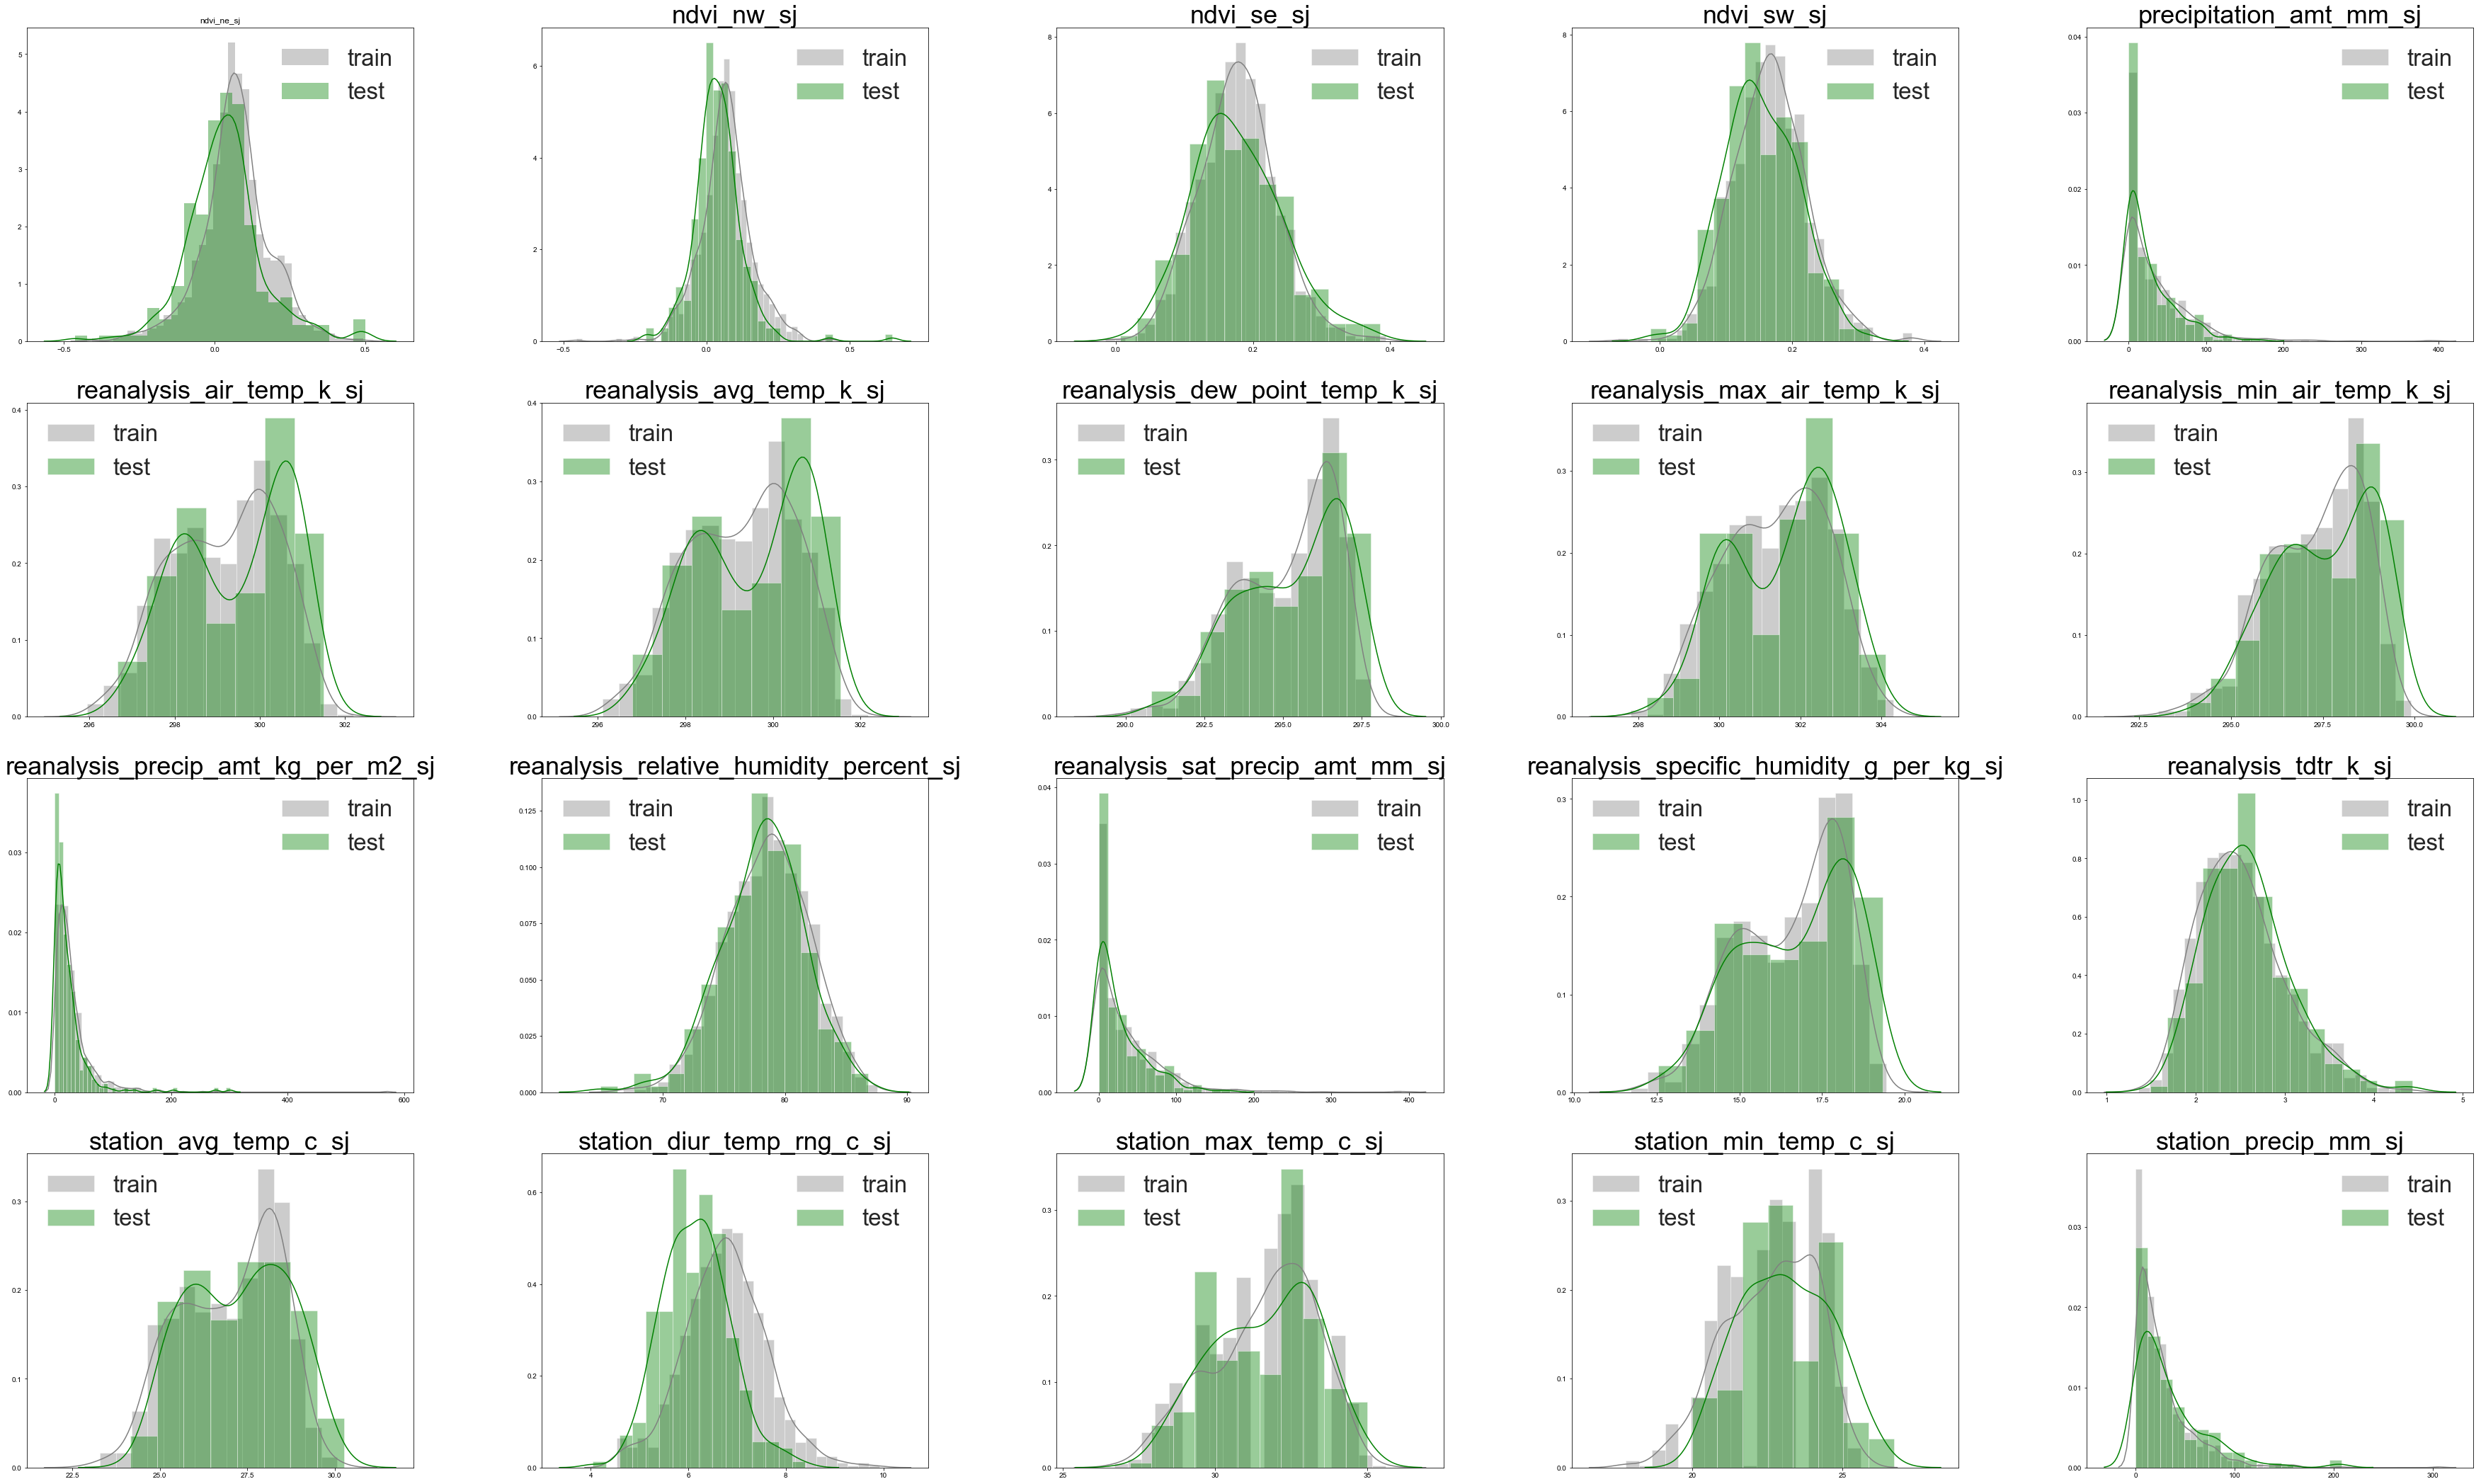

In [33]:
fig, axs = plt.subplots(4, 5, figsize=(50, 30))
axs = axs.flatten()
color = ['gray','green']
    
for i, (ax, feature) in enumerate(zip(axs, features_test)):
    sns.distplot(df_train_label_sj_imputated[feature], label="train", kde = True,ax=ax, color = color[0],axlabel = False)
    sns.distplot(df_test_sj_imputated[feature], label="test", ax=ax, kde = True, color = color[1],axlabel = False)
    ax.set_title(feature+str('_sj'))
    sns.set(font_scale=3) 
    sns.set_style("ticks")
    ax.legend(frameon=False)
    
plt.tight_layout()

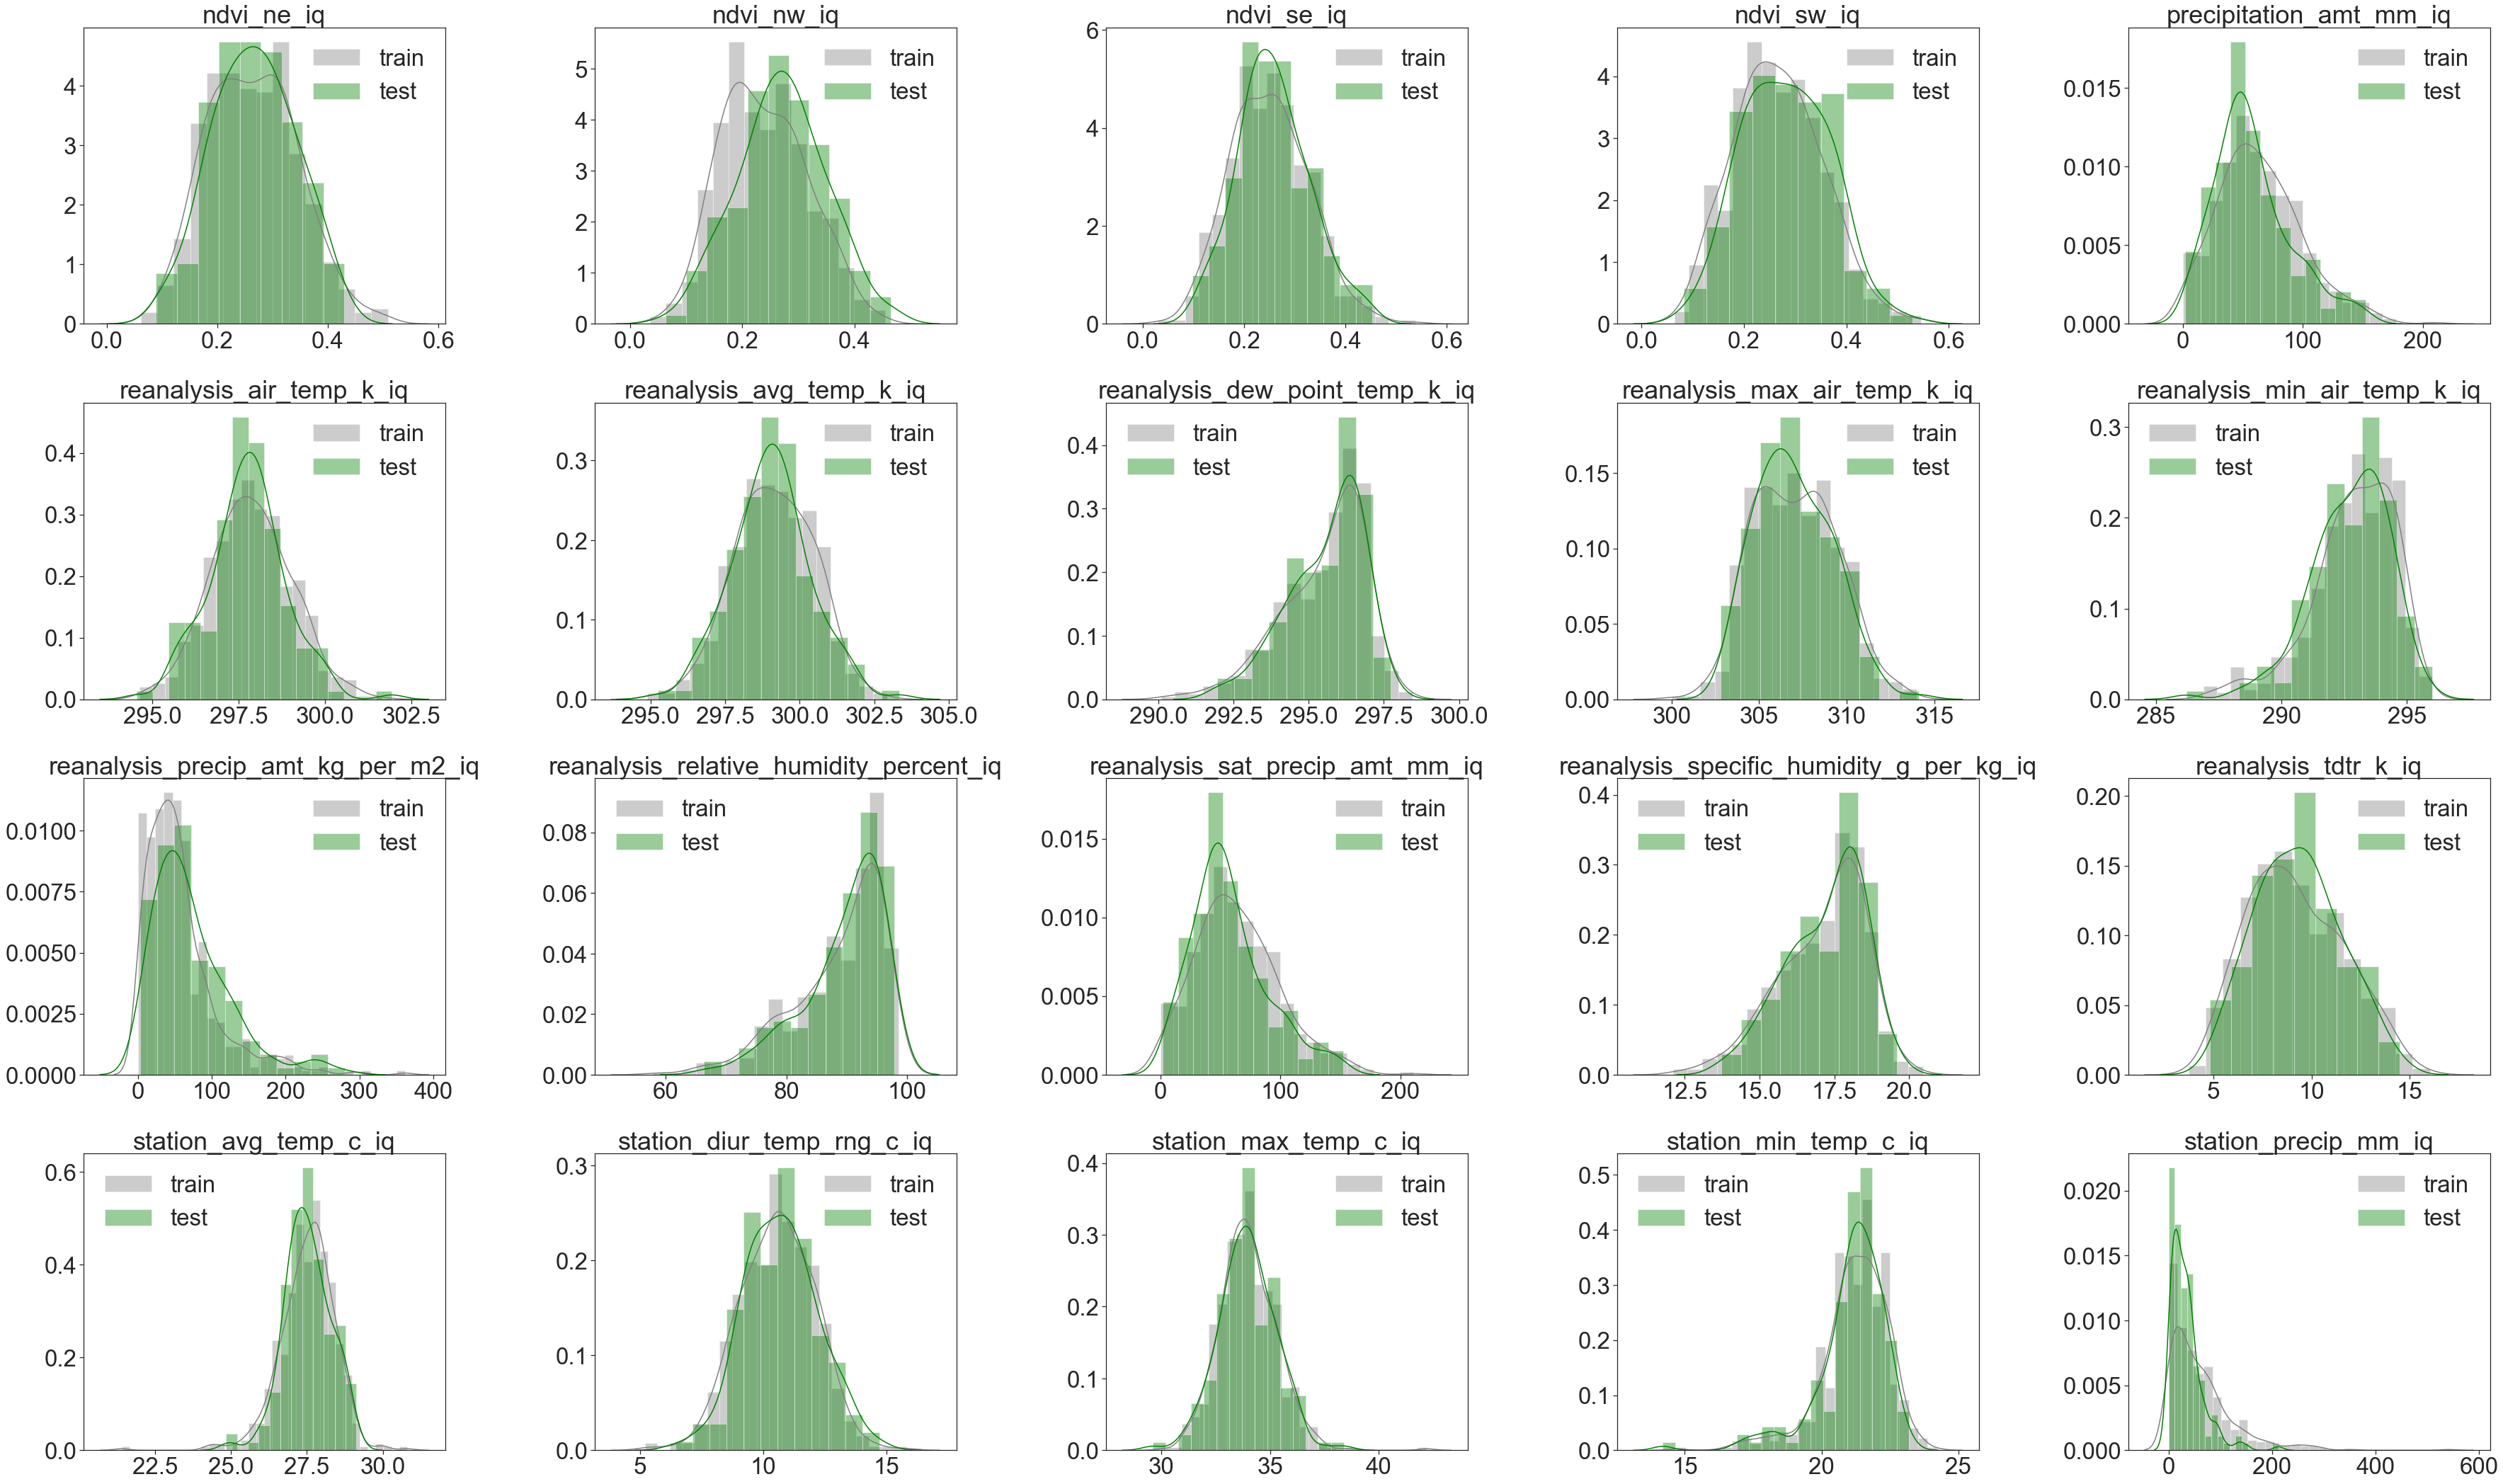

In [34]:
fig, axs = plt.subplots(4, 5, figsize=(50, 30))
axs = axs.flatten()
color = ['gray','green']
    
for i, (ax, feature) in enumerate(zip(axs, features_test)):
    sns.distplot(df_train_label_iq_imputated[feature], label="train", kde = True,ax=ax, color = color[0],axlabel = False)
    sns.distplot(df_test_iq_imputated[feature], label="test", ax=ax, kde = True, color = color[1],axlabel = False)
    ax.set_title(feature+str('_iq'))
    sns.set(font_scale=3) 
    sns.set_style("ticks")
    ax.legend(frameon=False)
    
plt.tight_layout()

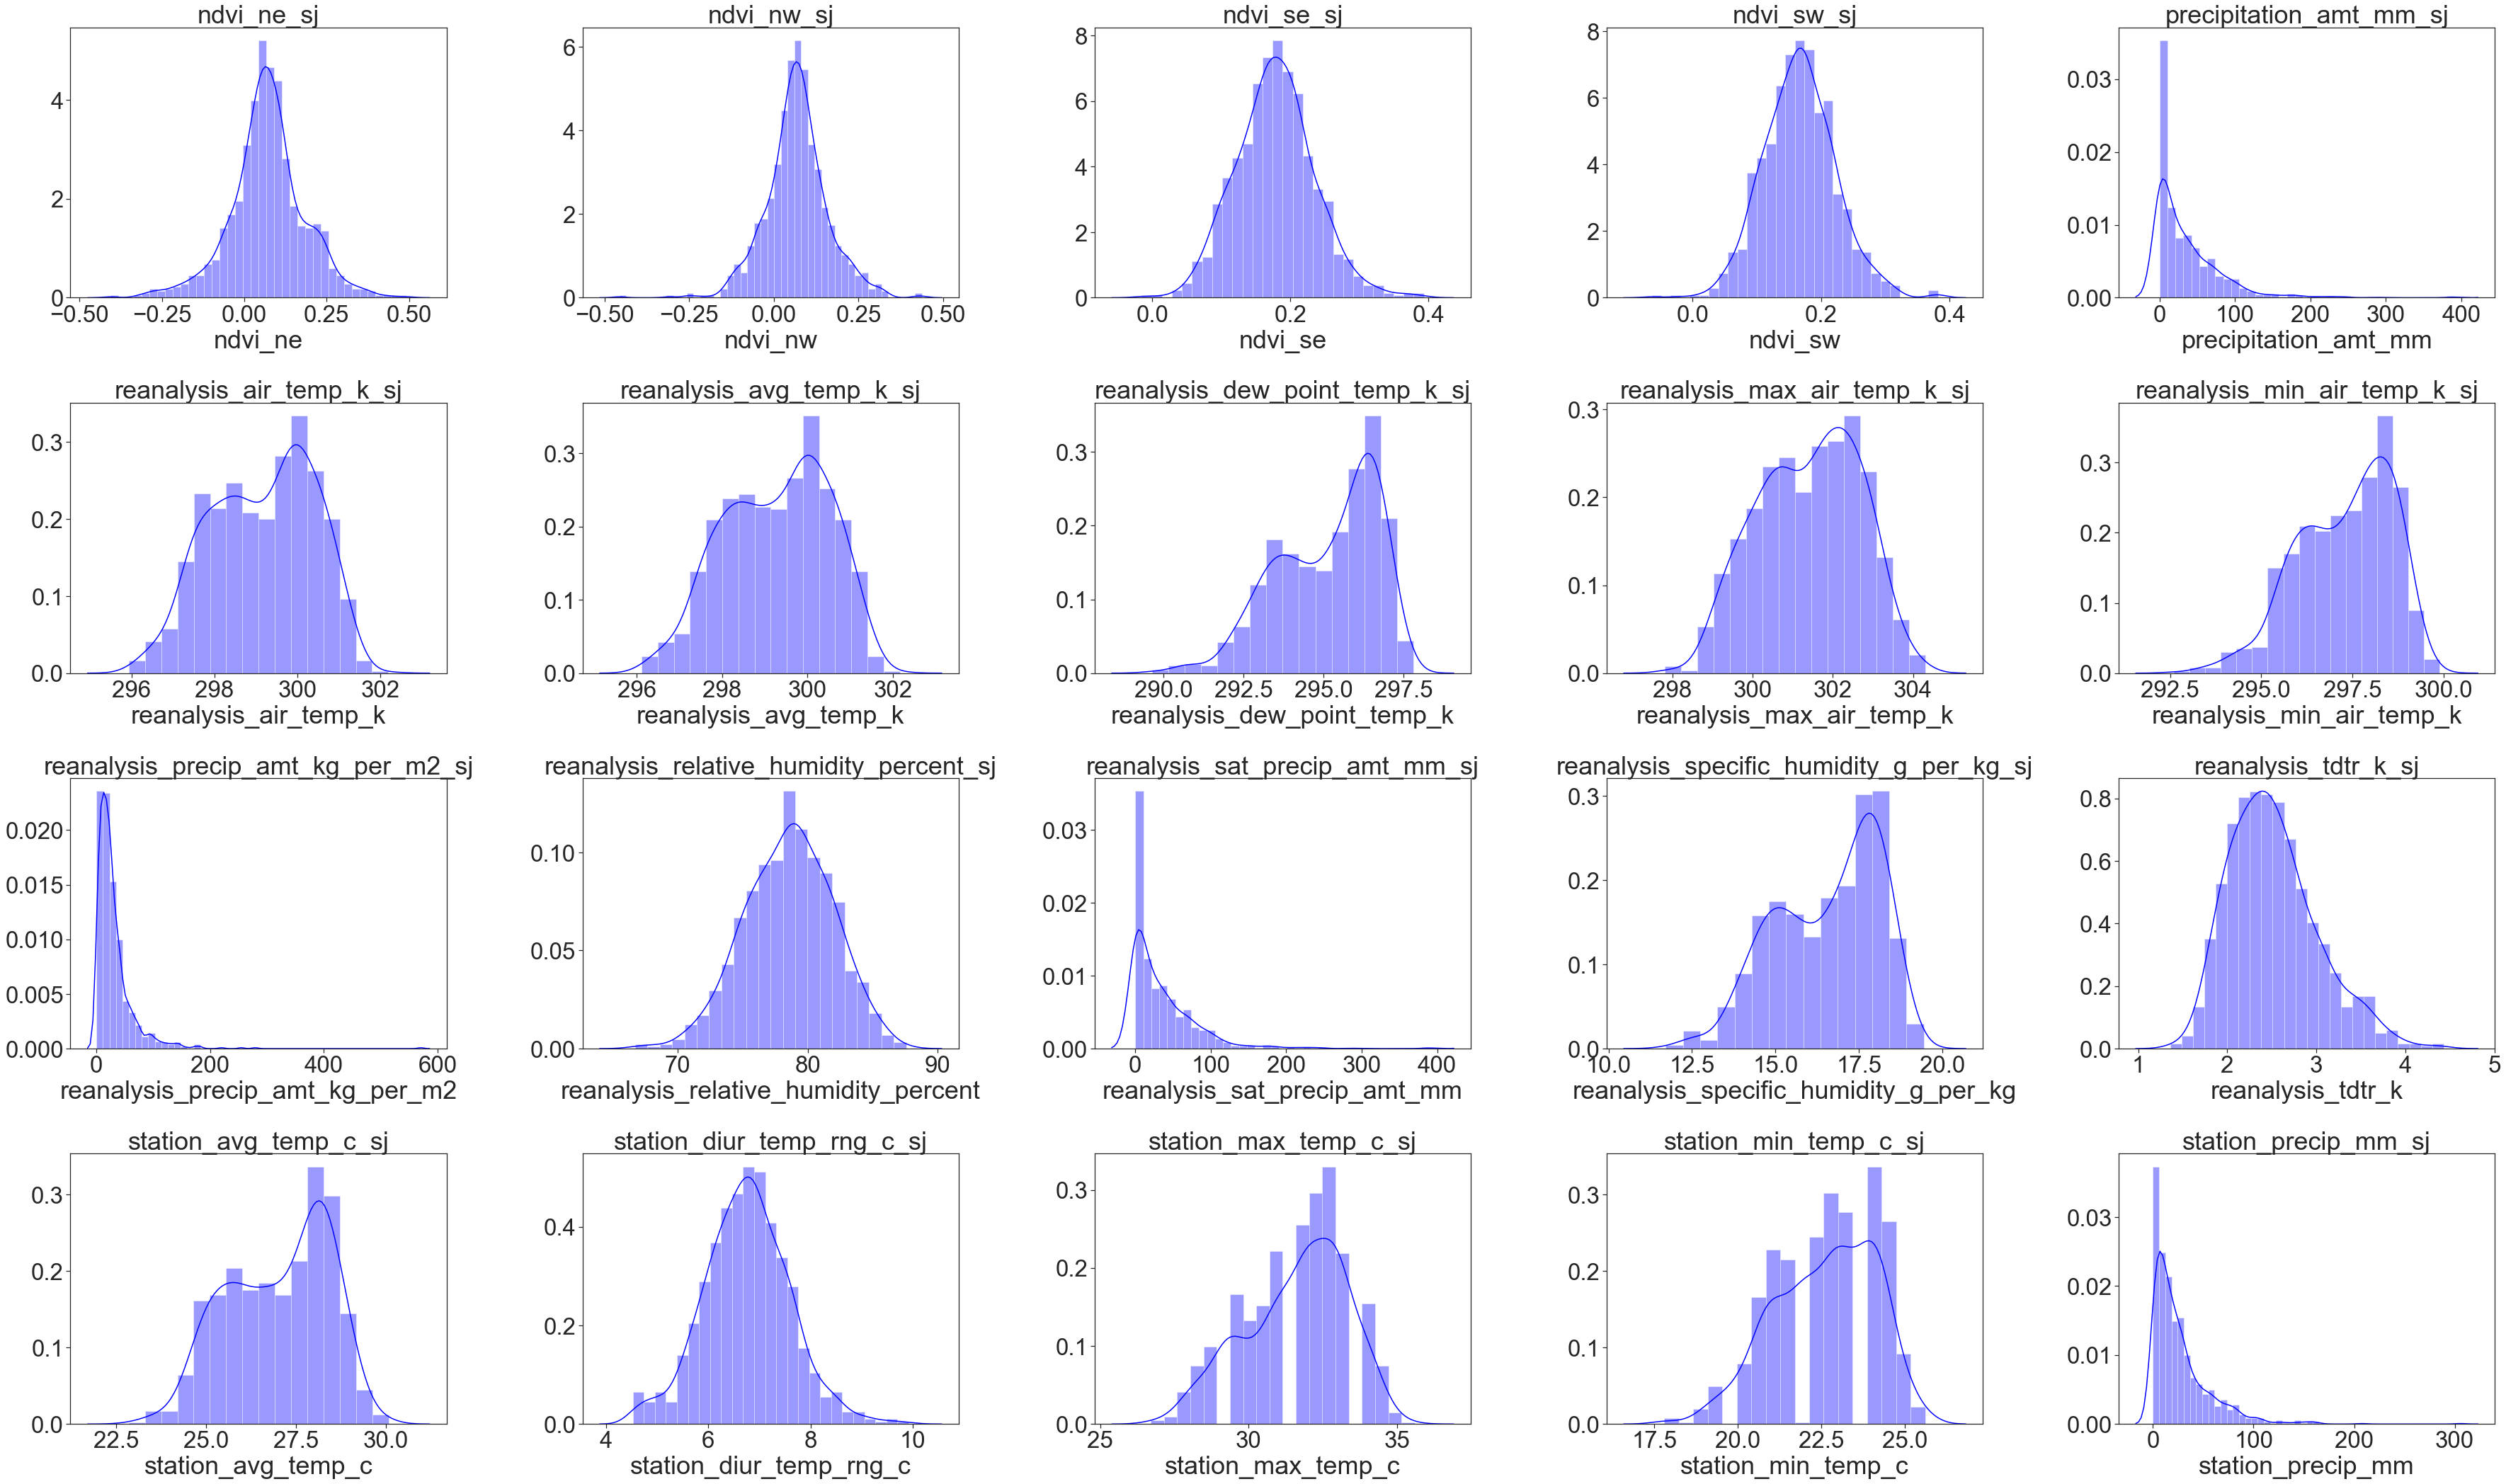

In [35]:
fig, axs = plt.subplots(nrows = 4,ncols = 5, figsize=(50, 30))
axs = axs.flatten()
    
for i, (ax, feature) in enumerate(zip(axs, features_train)):
    sns.distplot(df_train_label_sj_imputated[feature], ax=ax, kde = True, color = 'blue')
    ax.set_title(feature+str('_sj'))
    sns.set(font_scale=3) 
    sns.set_style("ticks")
    
plt.tight_layout()

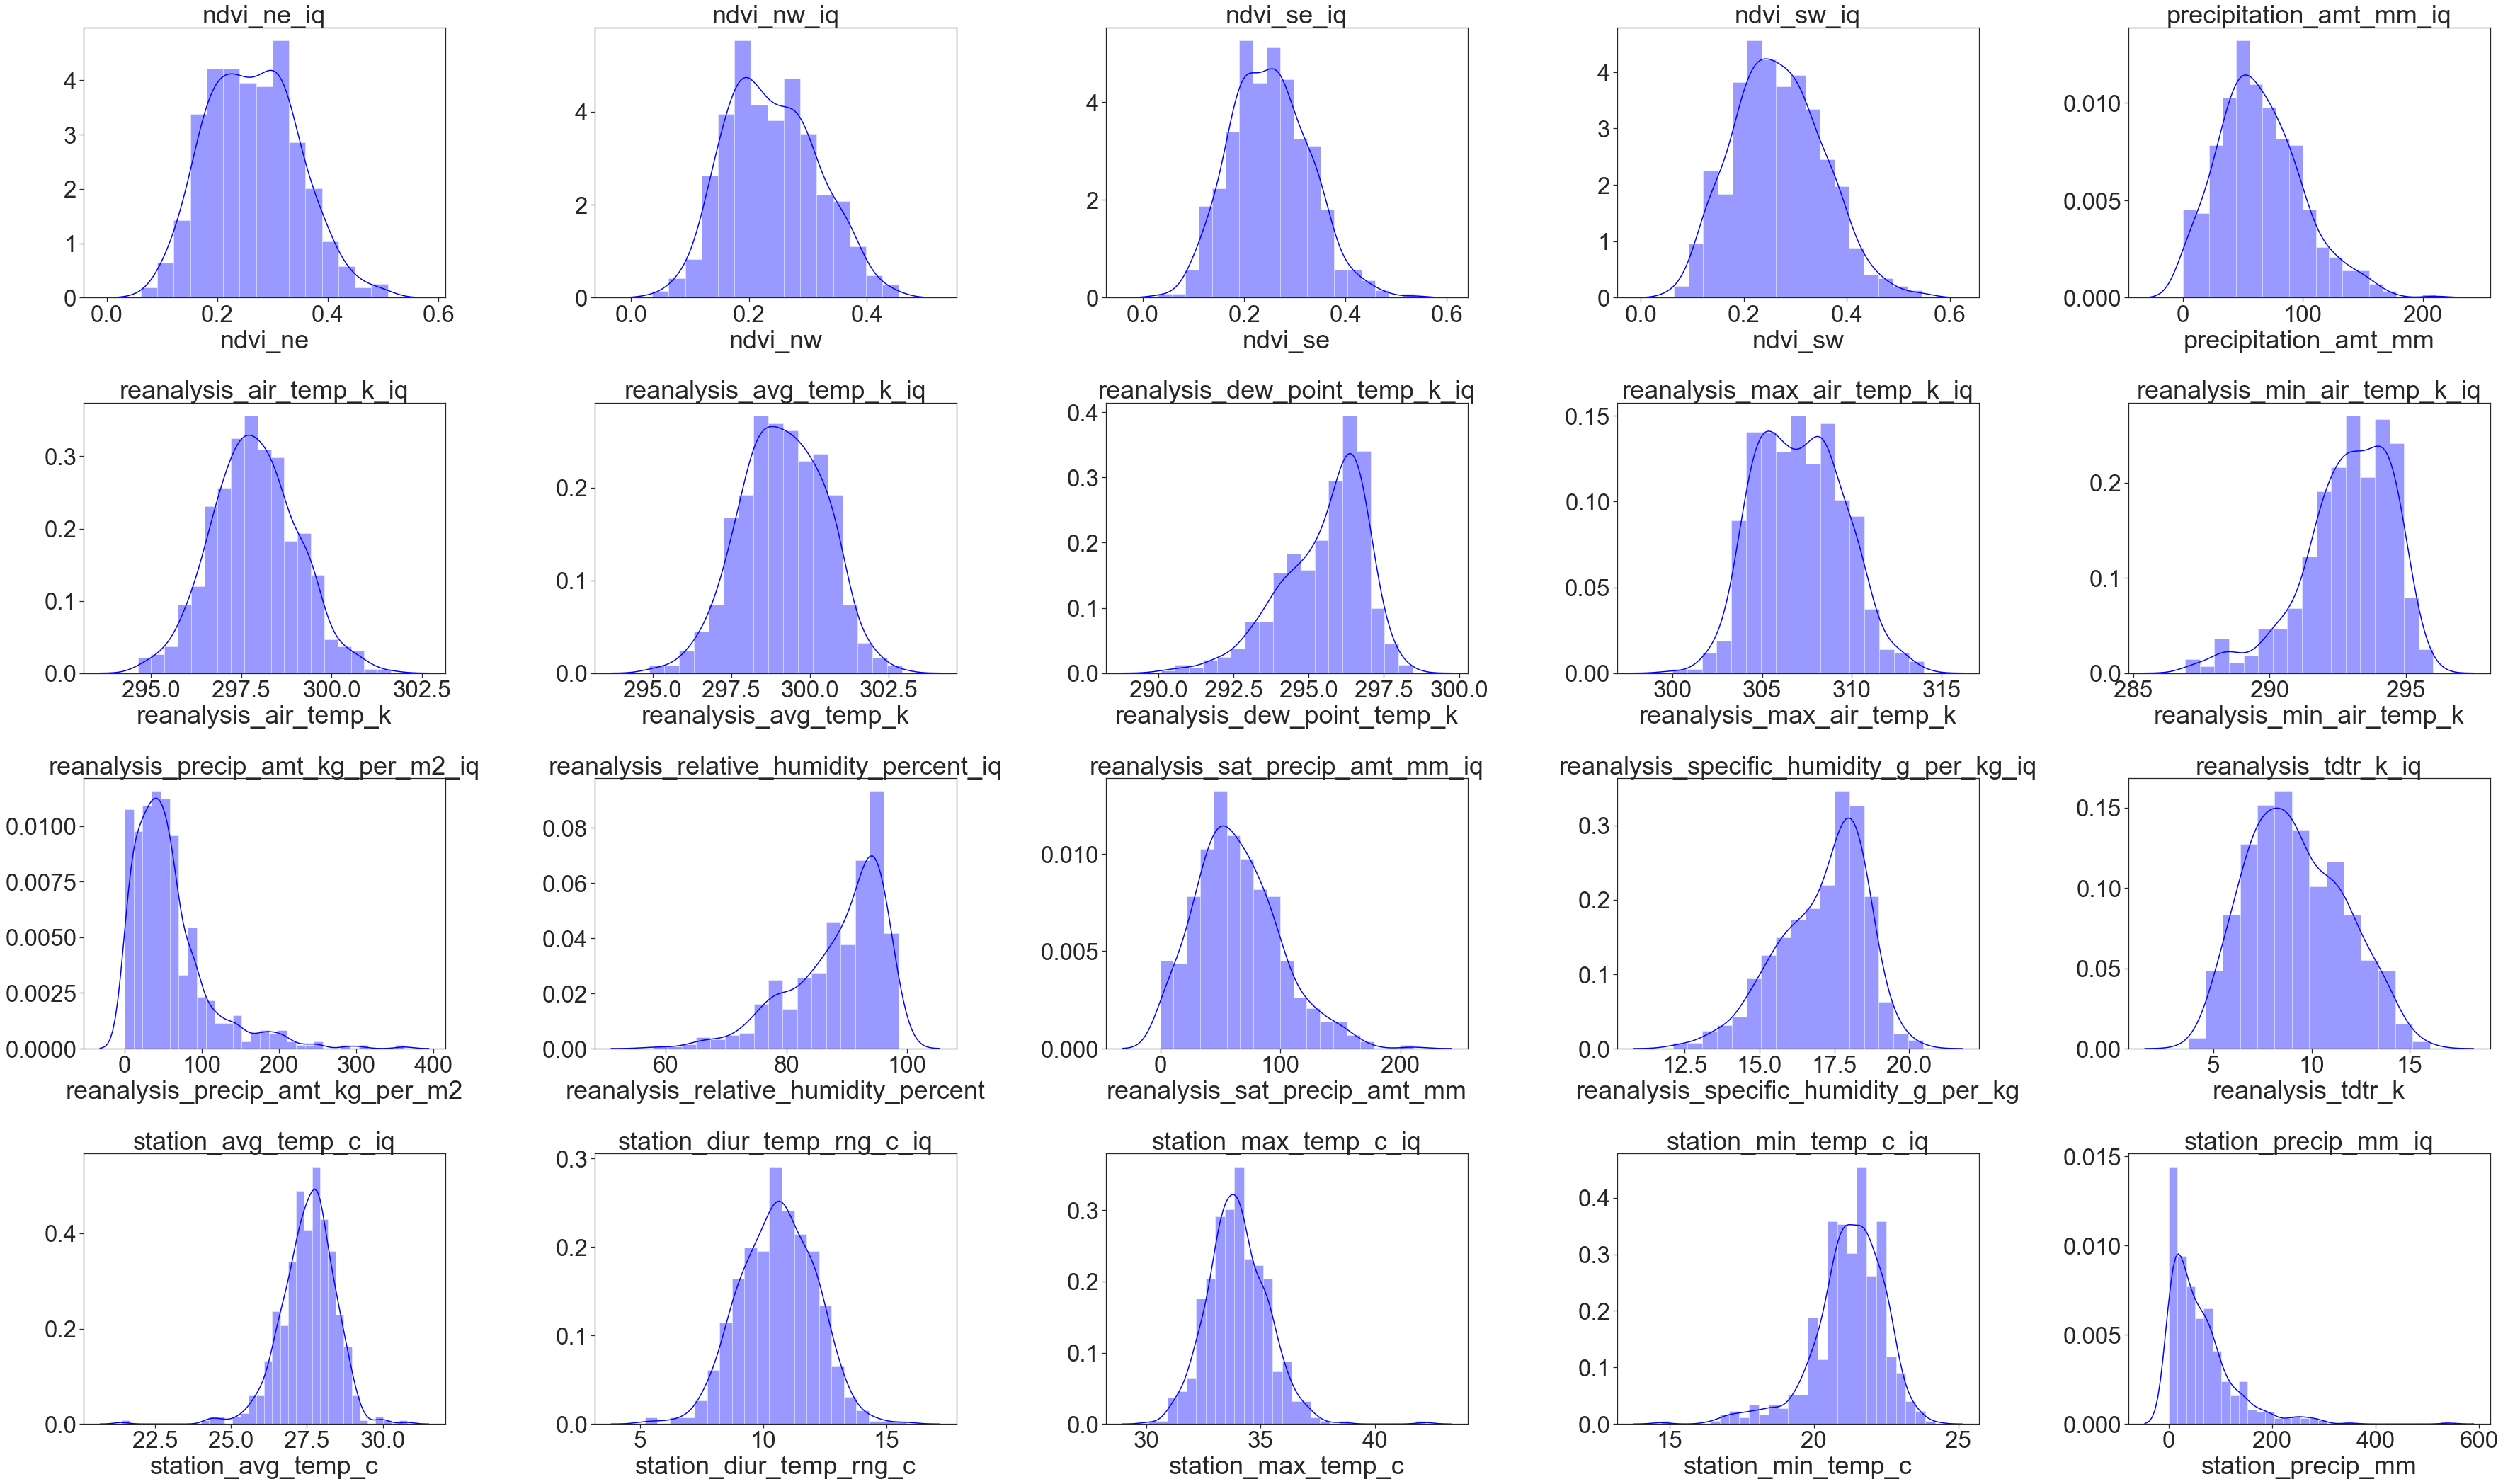

In [36]:
fig, axs = plt.subplots(nrows = 4,ncols = 5, figsize=(50, 30))
axs = axs.flatten()
    
for i, (ax, feature) in enumerate(zip(axs, features_train)):
    sns.distplot(df_train_label_iq_imputated[feature], ax=ax, kde = True, color = 'blue')
    ax.set_title(feature+str('_iq'))
    sns.set(font_scale=3) 
    sns.set_style("ticks")
    
plt.tight_layout()

## feature correlation

##### df_train SJ

In [37]:
# Compute Pearson correlation for every pair of features
# Use only training data
pcorrs_sj = pd.DataFrame(df_train_label_sj_imputated.corr()['total_cases'].sort_values()).reset_index()
pcorrs_sj = pcorrs_sj.rename(columns = {'index':'feature', 'total_cases':'pcorr_sj'})

print('Most negatively correlated variables:')
pcorrs_sj.head()

Most negatively correlated variables:


feature  pcorr_sj
0        reanalysis_tdtr_k -0.068327
1                  ndvi_sw -0.001696
2                  ndvi_se  0.014337
3                  ndvi_ne  0.014695
4  station_diur_temp_rng_c  0.033547

In [38]:
print('Most positively correlated variables:')
pcorrs_sj.tail()

Most positively correlated variables:


feature  pcorr_sj
16              reanalysis_max_air_temp_k  0.194986
17                     station_avg_temp_c  0.197444
18            reanalysis_dew_point_temp_k  0.204425
19  reanalysis_specific_humidity_g_per_kg  0.208603
20                            total_cases  1.000000

Text(0.5, 1.0, 'Iquitos Variable Correlations')

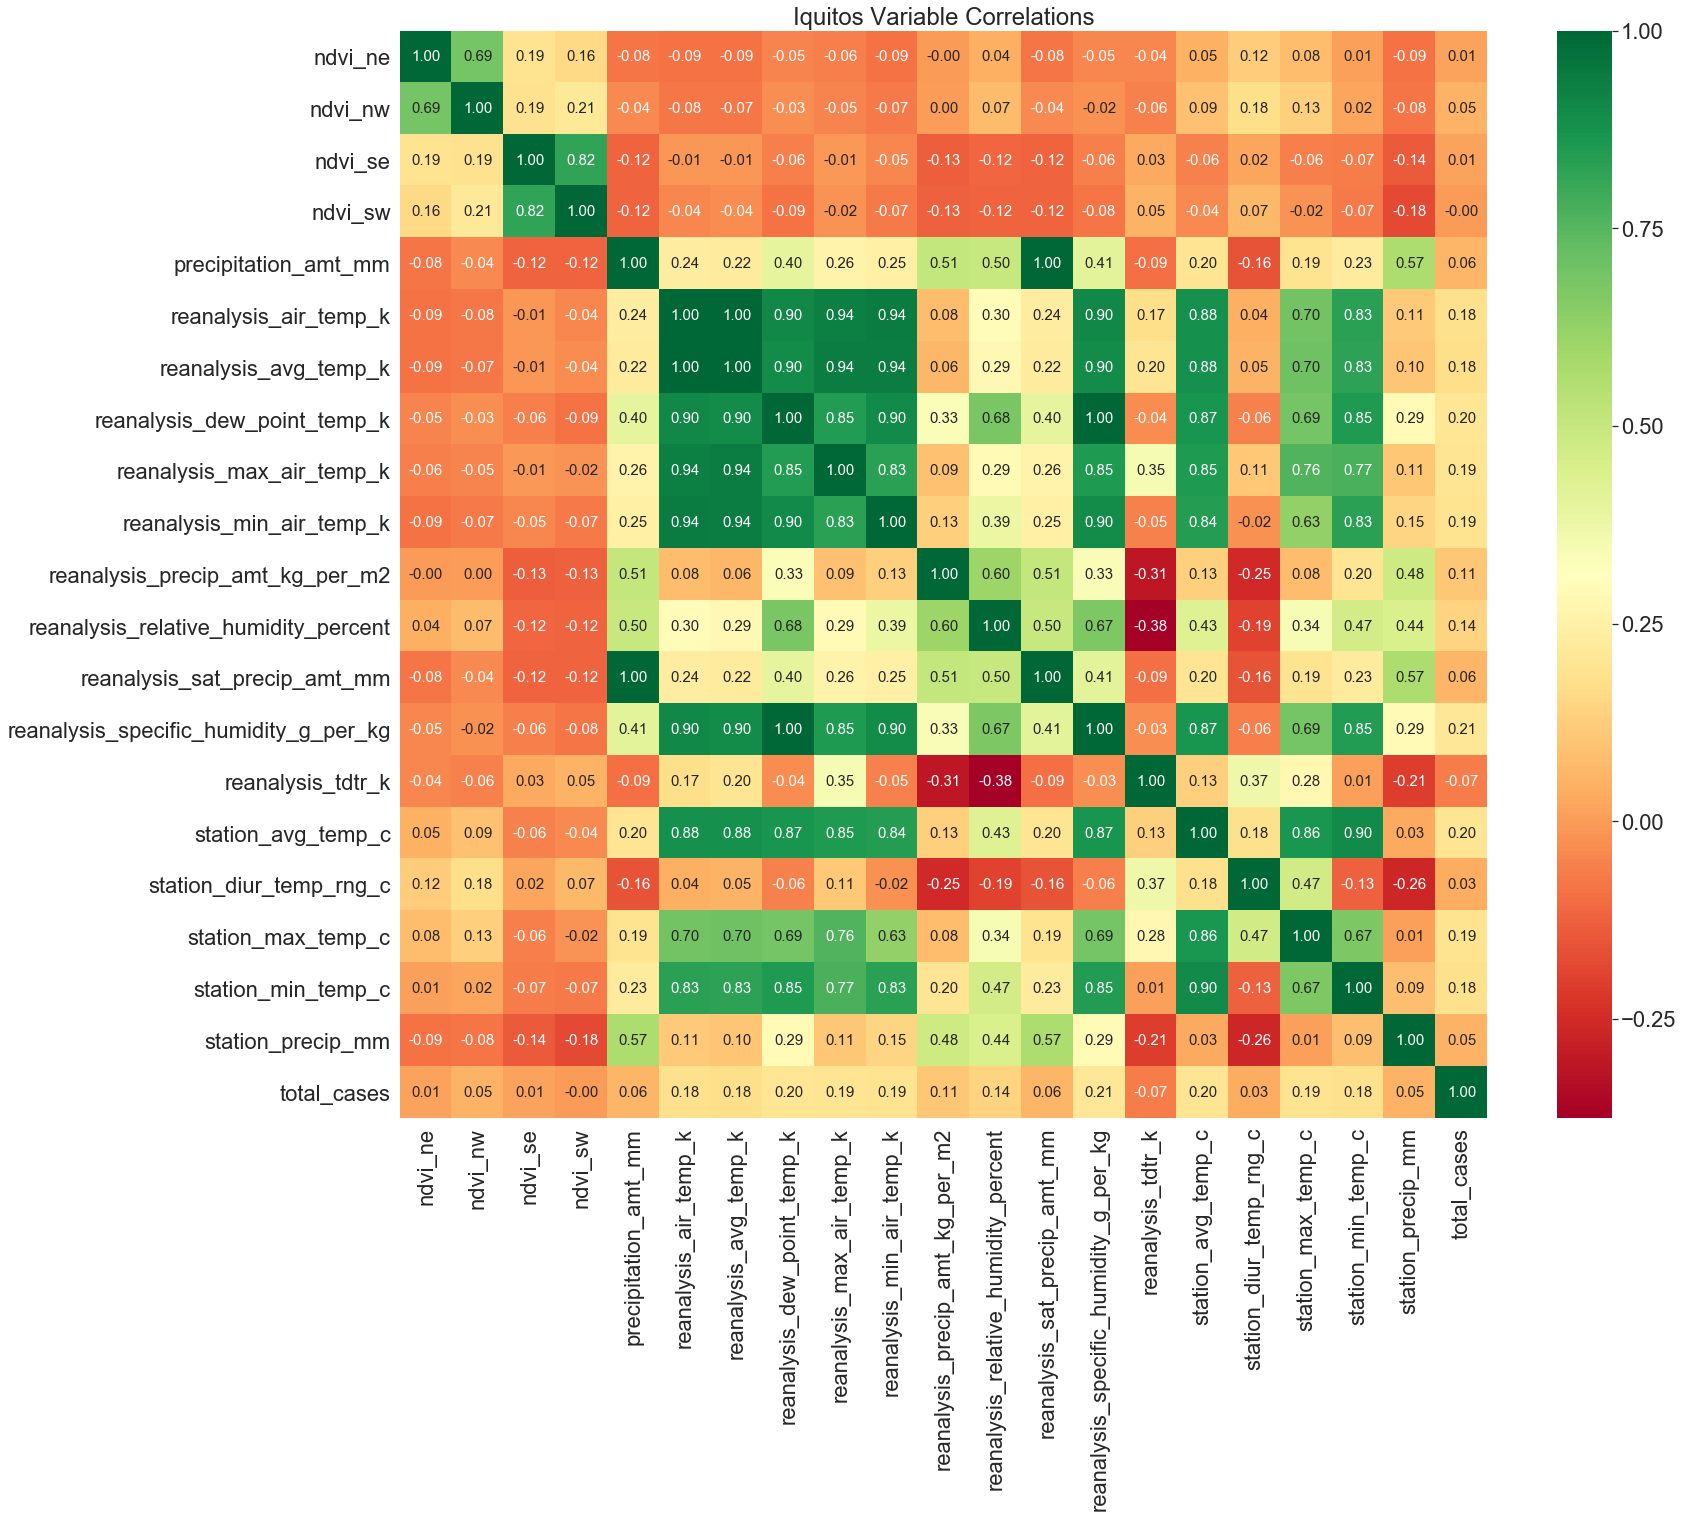

In [39]:
plt.figure(figsize=(25, 20))
sns.set(font_scale=2)
sns.heatmap(df_train_label_sj_imputated.corr(), square=True, cmap='RdYlGn',annot=True,annot_kws={'size': 15},fmt='.2f')
plt.title('Iquitos Variable Correlations')

In [40]:
pcorrs_sj = pcorrs_sj.sort_values(ascending = False, by = 'pcorr_sj')
pcorrs_sj = pcorrs_sj[pcorrs_sj.feature != 'total_cases']

data = [go.Bar(x = pcorrs_sj['pcorr_sj'],\
               y = pcorrs_sj['feature'],\
               orientation = 'h',\
               marker = dict(color ='rgba(0, 0, 255, 0.6)',\
                             line = dict(color='rgba(0, 0, 255, 1.0)', width = 1)))]

layout = go.Layout(height=500, width=1000,\
                  yaxis = dict(automargin = True),\
                  title = 'correlation iq')

fig = go.Figure(data, layout)

plotly.offline.iplot(fig)

##### df_train IQ

In [41]:
# Compute Pearson correlation for every pair of features
# Use only training data
pcorrs_iq = pd.DataFrame(df_train_label_iq_imputated.corr()['total_cases'].sort_values()).reset_index()
pcorrs_iq = pcorrs_iq.rename(columns = {'index':'feature', 'total_cases':'pcorr_iq'})

print('Most negatively correlated variables:')
pcorrs_iq.head()

Most negatively correlated variables:


feature  pcorr_iq
0          reanalysis_tdtr_k -0.133404
1  reanalysis_max_air_temp_k -0.055917
2    station_diur_temp_rng_c -0.046785
3                    ndvi_se -0.041047
4                    ndvi_nw -0.010049

In [42]:
print('Most positively correlated variables:')
pcorrs_iq.tail()

Most positively correlated variables:


feature  pcorr_iq
16                     station_min_temp_c  0.190866
17              reanalysis_min_air_temp_k  0.212681
18            reanalysis_dew_point_temp_k  0.228423
19  reanalysis_specific_humidity_g_per_kg  0.234381
20                            total_cases  1.000000

Text(0.5, 1.0, 'iq Variable Correlations')

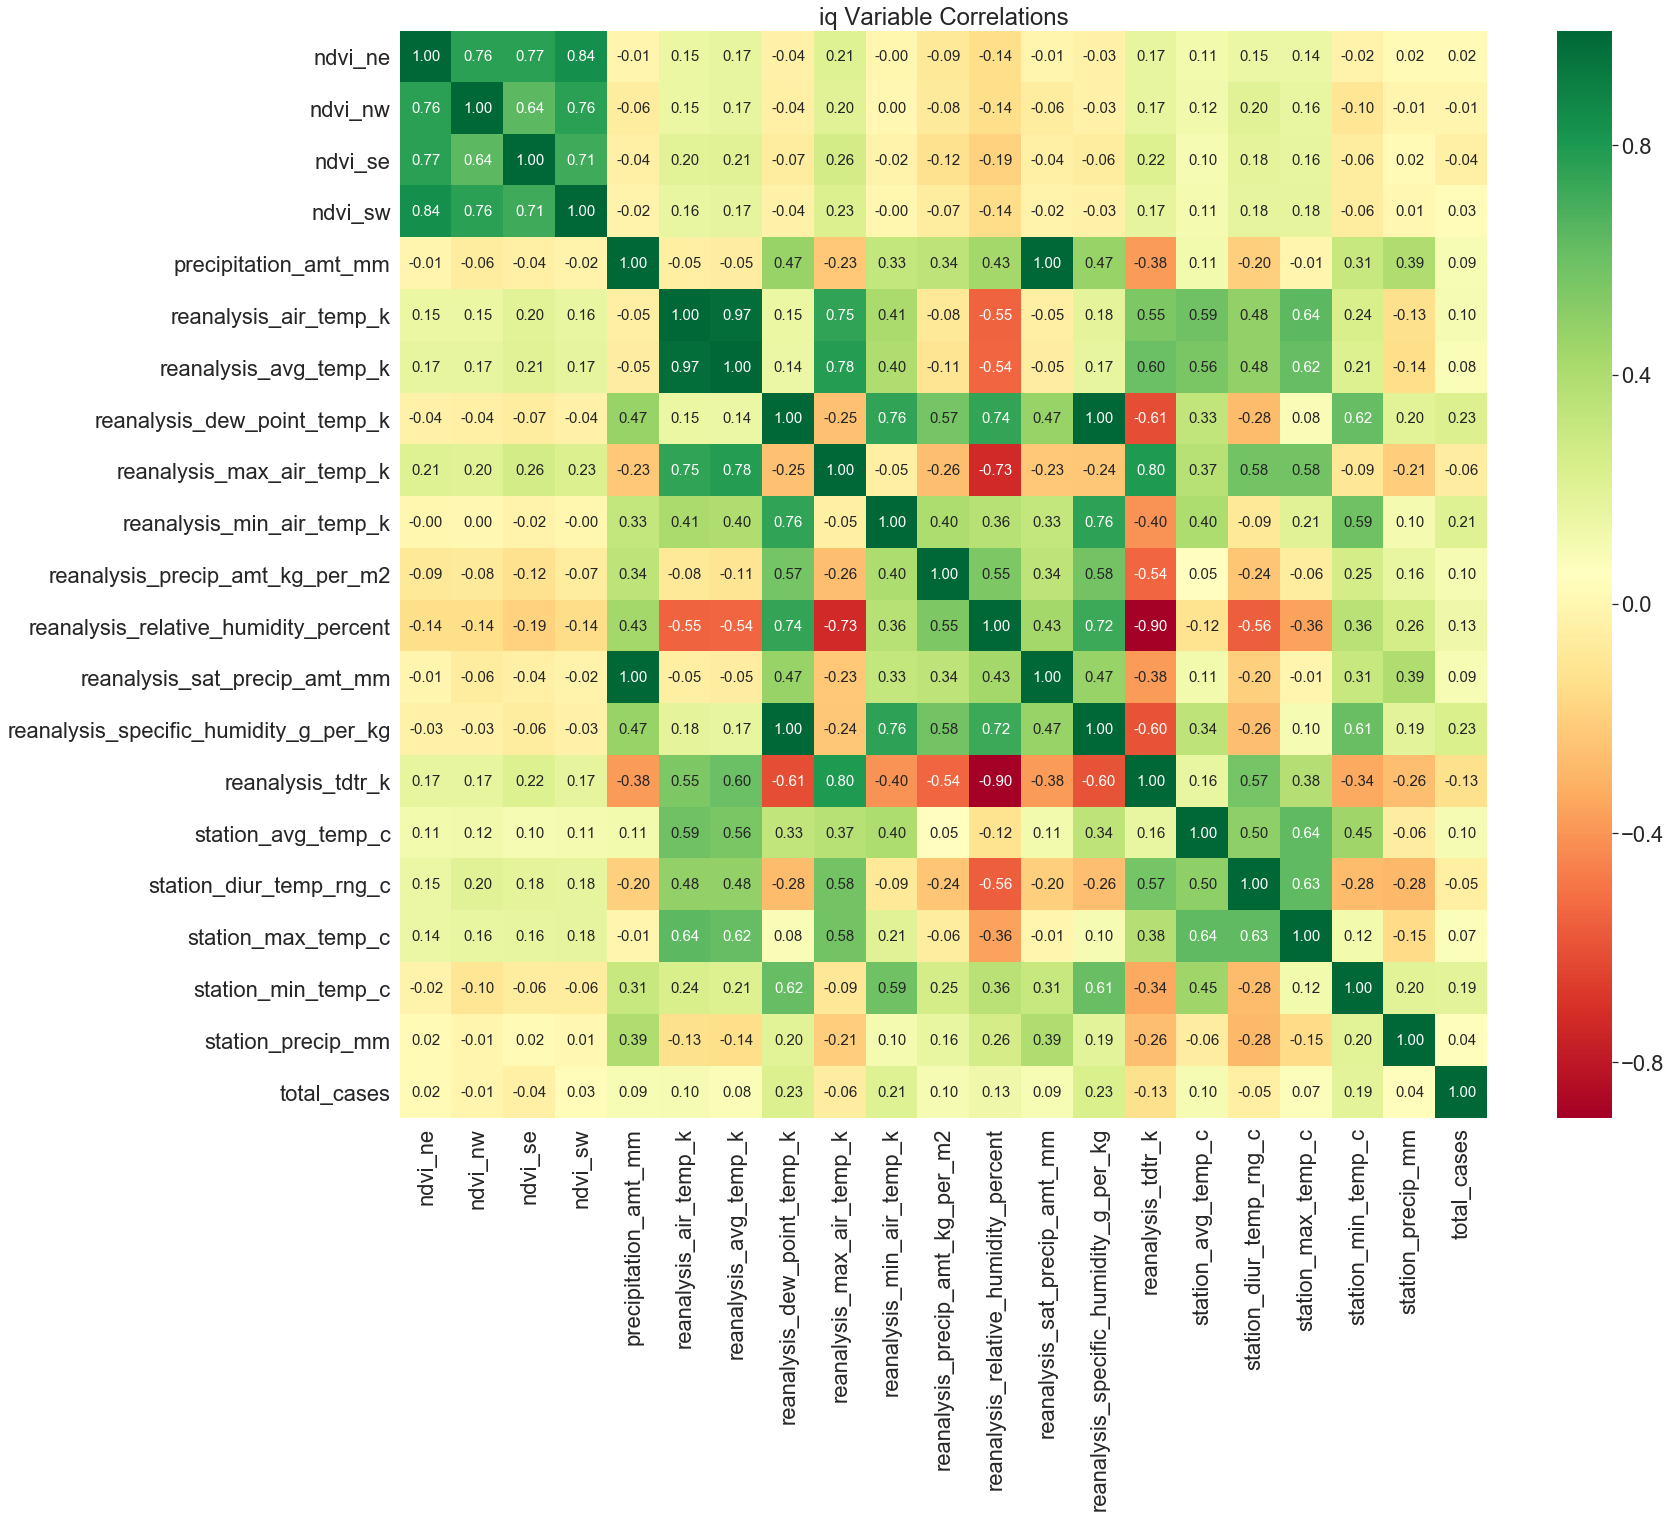

In [43]:
plt.figure(figsize=(25, 20))
sns.set(font_scale=2)
sns.heatmap(df_train_label_iq_imputated.corr(), square=True, cmap='RdYlGn',annot=True,annot_kws={'size': 15},fmt='.2f')
plt.title('iq Variable Correlations')

In [44]:
pcorrs_iq = pcorrs_iq.sort_values(ascending = False, by = 'pcorr_iq')
pcorrs_iq = pcorrs_iq[pcorrs_iq.feature != 'total_cases']

data = [go.Bar(x = pcorrs_iq['pcorr_iq'],\
               y = pcorrs_iq['feature'],\
               orientation = 'h',\
               marker = dict(color ='rgba(255,127,80, 0.6)',\
                             line = dict(color='rgba(255,127,80, 1.0)', width = 1)))]

layout = go.Layout(height=500, width=1000,\
                  yaxis = dict(automargin = True),\
                  title = 'correlation iq')

fig = go.Figure(data, layout)

plotly.offline.iplot(fig)

In [45]:
years_sj = df_train_label_sj_imputated.index.get_level_values('year').unique().to_list()
years_iq = df_train_label_iq_imputated.index.get_level_values('year').unique().to_list()

In [46]:
scatter_labels = []
figs_scatter = []

for m, df in enumerate([df_train_label_sj_imputated, df_train_label_iq_imputated]):
    figs_scatter.append(go.Scatter(y = df['total_cases']))
    scatter_labels.append('total cases %s' %df.index.get_level_values('city').unique()[0])

#create grid
my_fig = tls.make_subplots(subplot_titles =  scatter_labels, rows = 2, cols = 1)
my_fig['layout'].update(showlegend = False, height=1000, width=1000,\
                        yaxis = dict(title = 'count'),\
                        yaxis2 = dict(title = 'count'),\
                        xaxis = dict(ticktext = years_sj, tickvals = list(range(0,936,50))),\
                        xaxis2 = dict(ticktext = years_iq, tickvals = list(range(0,520,48))))

#append all distplots
for i,fig in enumerate(figs_scatter):
    my_fig.append_trace(fig,i+1,1)
    
plotly.offline.iplot(my_fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



## Standard / Exponential Moving Average

##### Exponential Moving Average (ESA)

In [51]:
df_train_sj_ema = df_train_label_sj_imputated.ewm(span=20, adjust=False).mean()
df_train_iq_ema = df_train_label_iq_imputated.ewm(span=20, adjust=False).mean()

##### Standard Moving Average (SMA)

In [47]:
df_train_sj_sma = df_train_label_sj_imputated.rolling(window=40).mean()
df_train_iq_sma = df_train_label_iq_imputated.rolling(window=40).mean()

##### plot

In [61]:
def plot_raw_ema (df_raw, df_ema):
    figs_scatter = []
    analysis = ['raw', 'EMA']
    
    for m, df in enumerate([df_raw, df_ema]):
        label = analysis[m] + '_' + str(df.index.get_level_values('city').unique()[0])
        figs_scatter.append(go.Scatter(y = df['total_cases'], name = label))

    #create grid

    layout = go.Layout(showlegend = True, height=500, width=1000,\
                        yaxis = dict(title = 'count'),\
                        xaxis = dict(ticktext = years_sj, tickvals = list(range(0,936,50))))

    fig = go.Figure(figs_scatter,layout)
    plotly.offline.iplot(fig)

In [62]:
plot_raw_ema(df_train_label_sj_imputated, df_train_sj_ema)

In [63]:
plot_raw_ema(df_train_label_iq_imputated, df_train_iq_ema)

# Model and Prediction

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, classification_report, roc_auc_score, roc_curve, make_scorer, f1_score

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, KFold

# Since the dataset is class-balanced, we can use macro averaging for the F1 scorer
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [49]:
# Extract training data and labels
train_set = df_train_final.drop(columns = ['patient_id','heart_disease_present'])
test_set = df_test_final.drop(columns = ['patient_id','heart_disease_present'])
test_ids = df_test_final['patient_id'].values
train_labels = np.asarray(df_train_final['heart_disease_present'])

[num_examples,num_feat] = train_set.shape

# Submission base which is used for making submissions to the competition
submission_base = df_combine[len_train:][['patient_id']].copy()

print(train_set.shape)
print(test_set.shape)
print(train_labels.shape)

NameError: name 'df_train_final' is not defined